In [711]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Scikit-learn
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [712]:
df = pd.read_csv ("C:/Users/blien/Documents/WGU/D209/Task2/3kfid8emf9rkc9ek30sf/medical_clean.csv",dtype={'locationid':np.int64}) 
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [713]:
print(df.isnull().sum())

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [714]:
# Remove less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis
df = df.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'Job', 'Marital', 
       'CaseOrder', 'Zip', 'Lat', 'Lng', 'Population', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
df.head()

,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,Male,No,19.141466,6,0,0,No,...,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420
1,3,51,46805.99,Female,No,18.940352,4,2,1,No,...,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120
2,3,53,14370.14,Female,No,18.057507,4,1,0,No,...,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460
3,0,78,39741.49,Male,No,16.576858,4,1,0,No,...,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350
4,1,22,1209.56,Female,No,17.439069,5,0,2,Yes,...,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786


In [715]:
# variable for categorical data
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'HighBlood',
       'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')


In [716]:
# variable for numeric data
num_cols = df.select_dtypes(include="number").columns
print(num_cols)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')


In [717]:
df.dtypes

Children                int64
Age                     int64
Income                float64
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
Additional_charges    float64
dtype: object

In [718]:
# creating a dictionary 
# with column name and data type
data_types_dict = {'Income': int,
                  'VitD_levels': int,
                  'Initial_days': int,
                  'TotalCharge': int,
                  'Additional_charges': int}
  
# we will change the data type 
# of id column to str by giving
# the dict to the astype method
df = df.astype(data_types_dict)
  
# checking the data types
# using df.dtypes method
df.dtypes

Children               int64
Age                    int64
Income                 int32
Gender                object
ReAdmis               object
VitD_levels            int32
Doc_visits             int64
Full_meals_eaten       int64
vitD_supp              int64
Soft_drink            object
Initial_admin         object
HighBlood             object
Stroke                object
Complication_risk     object
Overweight            object
Arthritis             object
Diabetes              object
Hyperlipidemia        object
BackPain              object
Anxiety               object
Allergic_rhinitis     object
Reflux_esophagitis    object
Asthma                object
Services              object
Initial_days           int32
TotalCharge            int32
Additional_charges     int32
dtype: object

In [719]:
# convert categorical data into dummy variables 
for c in cat_cols:
    if c in df.columns:
        df = pd.get_dummies(df, columns=[c], drop_first=True)
pred_vars = df.select_dtypes(include="uint8").columns.tolist()
print(pred_vars)

['Gender_Male', 'Gender_Nonbinary', 'ReAdmis_Yes', 'Soft_drink_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']


In [720]:
#look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
Children                               10000 non-null int64
Age                                    10000 non-null int64
Income                                 10000 non-null int32
VitD_levels                            10000 non-null int32
Doc_visits                             10000 non-null int64
Full_meals_eaten                       10000 non-null int64
vitD_supp                              10000 non-null int64
Initial_days                           10000 non-null int32
TotalCharge                            10000 non-null int32
Additional_charges                     10000 non-null int32
Gender_Male                            10000 non-null uint8
Gender_Nonbinary                       10000 non-null uint8
ReAdmis_Yes                            10000 non-null uint8
Soft_drink_Yes                         10000 non-null uint8
Initial_admin_Emergency Admission      10000 non-nul

In [721]:
#put target at the end of dataset
df = df[['Children','Age', 'Income','VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',                           
'Additional_charges','Gender_Male', 'Gender_Nonbinary', 'Soft_drink_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI', 'ReAdmis_Yes']]

In [722]:
#print all features in data set
features = (list(df.columns[:-1]))
print('Features for analysis include: \n', features)

Features for analysis include: 
 ['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Gender_Male', 'Gender_Nonbinary', 'Soft_drink_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']


In [723]:
# Provide copy of the prepared data set.
final_data = 'd209_task2_final_data1.csv'
df.to_csv(final_data, index=False, header=True)
print('File saved to: {}'.format(final_data))

File saved to: d209_task2_final_data1.csv


In [724]:
import seaborn as sns
import matplotlib.pyplot as plt

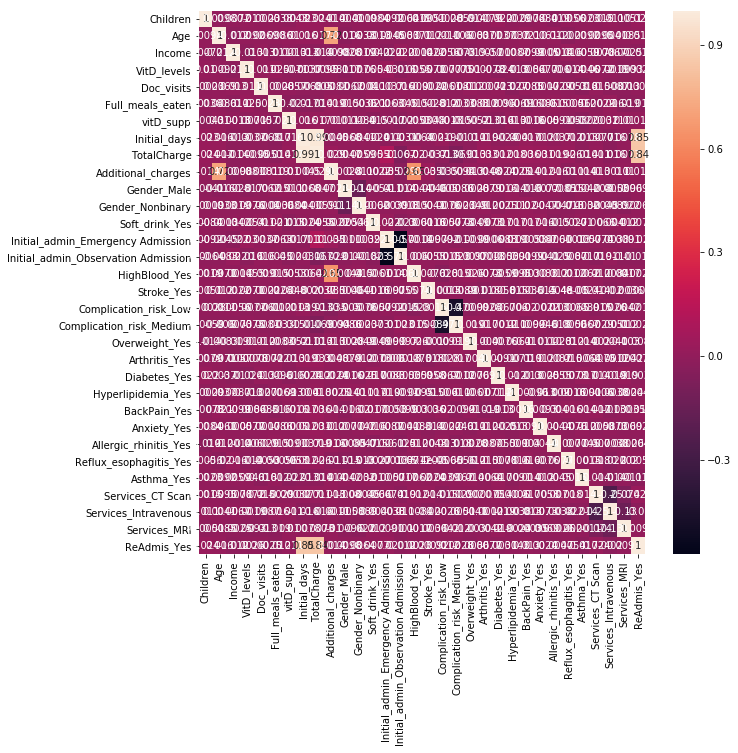

In [725]:
#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)

In [726]:
df.head(5)

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,...,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI,ReAdmis_Yes
0,1,53,86575,19,6,0,0,10,3726,17939,...,0,1,1,1,0,1,0,0,0,0
1,3,51,46805,18,4,2,1,15,4193,17612,...,0,0,0,0,1,0,0,1,0,0
2,3,53,14370,18,4,1,0,4,2434,17505,...,0,0,0,0,0,0,0,0,0,0
3,0,78,39741,16,4,1,0,1,2127,12993,...,0,0,0,0,1,1,0,0,0,0
4,1,22,1209,17,5,0,2,1,2113,3716,...,1,0,0,1,0,0,1,0,0,0


In [727]:
list(df.columns)

['Children',
 'Age',
 'Income',
 'VitD_levels',
 'Doc_visits',
 'Full_meals_eaten',
 'vitD_supp',
 'Initial_days',
 'TotalCharge',
 'Additional_charges',
 'Gender_Male',
 'Gender_Nonbinary',
 'Soft_drink_Yes',
 'Initial_admin_Emergency Admission',
 'Initial_admin_Observation Admission',
 'HighBlood_Yes',
 'Stroke_Yes',
 'Complication_risk_Low',
 'Complication_risk_Medium',
 'Overweight_Yes',
 'Arthritis_Yes',
 'Diabetes_Yes',
 'Hyperlipidemia_Yes',
 'BackPain_Yes',
 'Anxiety_Yes',
 'Allergic_rhinitis_Yes',
 'Reflux_esophagitis_Yes',
 'Asthma_Yes',
 'Services_CT Scan',
 'Services_Intravenous',
 'Services_MRI',
 'ReAdmis_Yes']

In [728]:
#preview
y = df['ReAdmis_Yes'] 
X = df[['Children','Age', 'Income','VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',                           
'Additional_charges','Gender_Male', 'Gender_Nonbinary', 'Soft_drink_Yes', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'HighBlood_Yes', 'Stroke_Yes', 'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 'BackPain_Yes', 'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']]


X.shape

(10000, 31)

In [729]:
#alpha values for graph
alphas = np.logspace(0, 5, 200)
alphas 

array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+00, 3.57078596e+00, 3.78346262e+00,
       4.00880633e+00, 4.24757155e+00, 4.50055768e+00, 4.76861170e+00,
       5.05263107e+00, 5.35356668e+00, 5.67242607e+00, 6.01027678e+00,
       6.36824994e+00, 6.74754405e+00, 7.14942899e+00, 7.57525026e+00,
       8.02643352e+00, 8.50448934e+00, 9.01101825e+00, 9.54771611e+00,
       1.01163798e+01, 1.07189132e+01, 1.13573336e+01, 1.20337784e+01,
       1.27505124e+01, 1.35099352e+01, 1.43145894e+01, 1.51671689e+01,
       1.60705282e+01, 1.70276917e+01, 1.80418641e+01, 1.91164408e+01,
       2.02550194e+01, 2.14614120e+01, 2.27396575e+01, 2.40940356e+01,
      

In [730]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(200, 31)

Text(0,0.5,'weights')

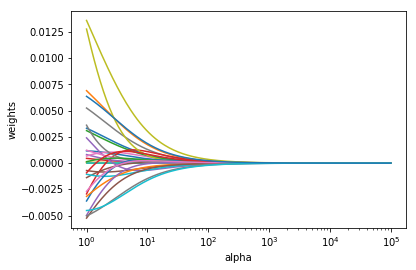

In [731]:
#graph alpha values
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [732]:
#split test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))


The dimension of X_train is (7000, 31)
The dimension of X_test is (3000, 31)


In [733]:
#train and test data export
X_train.to_csv(r'C:\Users\blien\Documents\WGU\D209\Task2\X_traincsv.csv')
X_test.to_csv(r'C:\Users\blien\Documents\WGU\D209\Task2\X_testcsv.csv')
y_train.to_csv(r'C:\Users\blien\Documents\WGU\D209\Task2\y_traincsv.csv')
y_test.to_csv(r'C:\Users\blien\Documents\WGU\D209\Task2\y_testcsv.csv')

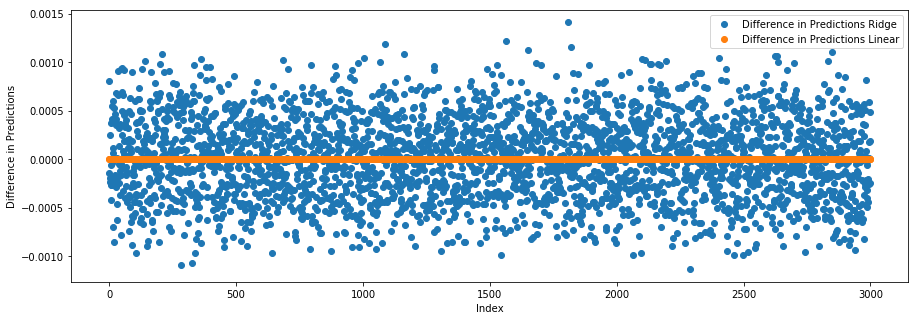

In [734]:
#vizualizing differences in linear and ridge regression

from sklearn import preprocessing, linear_model, model_selection, metrics, datasets, base
# Fit Ridge on  Raw data
model = linear_model.Ridge(alpha = 10, solver = 'cholesky')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Fit Ridge on Standardized data
model = linear_model.Ridge(alpha = 10, solver = 'cholesky')
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled , y_train)
scaled_predictions = model.predict(X_test_scaled)
# Store Predictions 
preds = pd.DataFrame()
#preds['Preds for Scaled Inputs'] = scaled_predictions
#preds['Preds for Raw Inputs'] = predictions
preds['Difference in Predictions Ridge'] = scaled_predictions - predictions



########################## Linear Regression ###############################
# Fit Linear Regression on  Raw data
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Fit Linear Regression on Standardized data
model = linear_model.LinearRegression()
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model.fit(X_train_scaled , y_train)
scaled_predictions = model.predict(X_test_scaled)
# Store Predictions 
#preds = pd.DataFrame()
#preds['Preds for Scaled Inputs'] = scaled_predictions
#preds['Preds for Raw Inputs'] = predictions
preds['Difference in Predictions Linear'] = scaled_predictions - predictions
# Visualize Predictions
preds.plot.line(figsize = (15, 5), linewidth = 0, marker = 'o')
plt.ylabel('Difference in Predictions')
plt.xlabel('Index')
plt.legend(bbox_to_anchor = [1, 1], frameon = True)



In [735]:
#prep for graph at bottom
def ridge_coefs(X_train_scaled, y_train, alphas):
    
    # list of coefficients:
    coefs = []
    
    # initiate the model
    ridge_reg = Ridge()
    
    # iterate through the alphas fed into the function:
    for a in alphas:
        
        # reinitiate with the new alpha:
        ridge_reg.set_params(alpha=a)
        
        # refit the model on the provided X, y
        ridge_reg.fit(X_train_scaled, y_train)
        
        # print the coefficient list
        coefs.append(ridge_reg.coef_)
        
    return coefs

In [736]:
# np.logspace gives us points between specified orders of magnitude on a logarithmic scale. It is base 10.
r_alphas = np.logspace(0, 5, 200)

# Get the coefficients for each alpha for the Ridge, using the function above
r_coefs = ridge_coefs(X_train_scaled, y_train, r_alphas)

In [737]:
#plotter code
from cycler import cycler

def coef_plotter(alphas, coefs, feature_names, to_alpha, regtype='ridge'):
    
    # Get the full range of alphas before subsetting to keep the plots from 
    # resetting axes each time. (We use these values to set static axes later).
    amin = np.min(alphas)
    amax = np.max(alphas)
    
    # Subset the alphas and coefficients to just the ones below the set limit
    # from the interactive widget:
    alphas = [a for a in alphas if a <= to_alpha]
    coefs = coefs[0:len(alphas)]
    
    # Get some colors from seaborn:
    colors = sns.color_palette("husl", len(coefs[0]))
    
    # Get the figure and reset the size to be wider:
    fig = plt.figure()
    fig.set_size_inches(18,5)

    # We have two axes this time on our figure. 
    # The fig.add_subplot adds axes to our figure. The number inside stands for:
    #[figure_rows|figure_cols|position_of_current_axes]
    ax1 = fig.add_subplot(121)
    
    # Give it the color cycler:
    ax1.set_prop_cycle(cycler('color', colors))
    
    # Print a vertical line showing our current alpha threshold:
    ax1.axvline(to_alpha, lw=2, ls='dashed', c='k', alpha=0.4)
    
    # Plot the lines of the alphas on x-axis and coefficients on y-axis
    ax1.plot(alphas, coefs, lw=2)
    
    # set labels for axes:
    ax1.set_xlabel('alpha', fontsize=20)
    ax1.set_ylabel('coefficients', fontsize=20)
    
    # If this is for the ridge, set this to a log scale on the x-axis:
    if regtype == 'ridge':
        ax1.set_xscale('log')
    
    # Enforce the axis limits:
    ax1.set_xlim([amin, amax])
    
    # Put a title on the axis
    ax1.set_title(regtype+' coefficients\n', fontsize=20)
    
    # Get the ymin and ymax for this axis to enforce it to be the same on the 
    # second chart:
    ymin, ymax = ax1.get_ylim()

    # Add our second axes for the barplot in position 2:
    ax2 = fig.add_subplot(122)
    
    # Position the bars according to their index from the feature names variable:
    ax2.bar(list(range(1, len(feature_names)+1)), coefs[-1], align='center', color=colors)
    ax2.set_xticks(list(range(1, len(feature_names)+1)))
    
    # Reset the ticks from numbers to acutally be the names:
    ax2.set_xticklabels(feature_names, rotation=65, fontsize=12)
    
    # enforce limits and add titles, labels
    ax2.set_ylim([ymin, ymax])
    ax2.set_title(regtype+' predictor coefficients\n', fontsize=20)
    ax2.set_xlabel('coefficients', fontsize=20)
    ax2.set_ylabel('alpha', fontsize=20)
    
    plt.show()

In [692]:
from ipywidgets import *
from IPython.display import display

def ridge_plot_runner(log_of_alpha=0):
    coef_plotter(r_alphas, r_coefs, X.columns, 10**log_of_alpha, regtype='ridge')

interact(ridge_plot_runner, log_of_alpha=(0.01,5,0.5))

interactive(children=(FloatSlider(value=0.01, description='log_of_alpha', max=5.0, min=0.01, step=0.5), Output…

<function __main__.ridge_plot_runner(log_of_alpha=0)>

In [738]:
rm.coef_

array([ 3.54623037e-03, -7.11526630e-03,  3.16109548e-03,  1.45541811e-03,
        7.21682546e-04,  2.34748633e-03,  2.84322235e-03,  1.49569163e-01,
        2.63850216e-01,  1.19260535e-02,  2.89941638e-03,  9.79837503e-04,
        2.87506738e-03, -1.07342061e-02,  4.05741474e-03, -9.04107659e-03,
       -1.91708403e-04,  1.52269873e-02,  3.00484149e-02,  9.80563084e-04,
       -8.97856830e-03, -4.27719555e-03, -3.76290714e-03, -8.10895227e-03,
       -6.29794365e-03, -7.88842639e-03, -7.28223467e-03, -2.68268668e-03,
        1.02604217e-02, -1.91993275e-03,  1.35910861e-03])

In [739]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 200)

In [740]:
ridge_model = Ridge()
coefficients = []

for i in r_alphas:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train_scaled, y_train)
    coefficients.append(ridge_model.coef_)

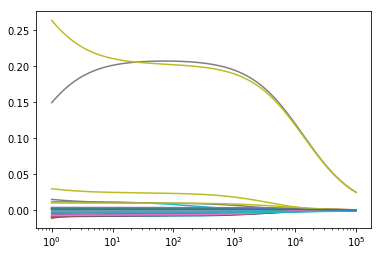

In [741]:
ax = plt.gca()
ax.plot(r_alphas, coefficients) 
ax.set_xscale("log")

In [742]:
#Set up initial model
rm = Ridge().fit(X_train_scaled, y_train)

In [743]:
#trained model RMSE
y_pred = rm.predict(X_train_scaled)
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

0.25265710568295596

In [744]:
from sklearn.model_selection import cross_val_score

In [745]:
#RMSE value for 10 fold CV for train data
np.sqrt(np.mean(-cross_val_score(rm, X_train_scaled, y_train, cv = 10,scoring = "neg_mean_squared_error")))

0.25399880125072377

In [746]:
rm_pred = rm.predict(X_test_scaled)

In [747]:
MSE = mean_squared_error(y_test, rm_pred)
RMSE = np.sqrt(mean_squared_error(y_test, rm_pred))


print("The MSE for the model is {}".format(MSE))  
print("The RMSE for the model is {}".format(RMSE))

The MSE for the model is 0.06356594343439319
The RMSE for the model is 0.2521228736834347


In [748]:
# Instantiate model.
ridge_model = Ridge()

# Fit model.
rm.fit(X_train_scaled, y_train)

# Generate predictions
ridge_preds = rm.predict(X_test_scaled)
ridge_preds_train = rm.predict(X_train_scaled)

# Evaluate model.
print(r2_score(y_test, ridge_preds))
print(r2_score(y_train, ridge_preds_train))

0.726271056981082
0.7252148496967927


In [749]:
# Set up a list of ridge alphas to check.
r_alphas = 10**np.linspace(10,-2,100)*0.5
# Generates 200 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

# Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, scoring='neg_mean_squared_error')

# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(X_train_scaled, y_train)

In [750]:
# Here is the optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

66.09705742330144

In [751]:
# transform the df
Z_test = pd.DataFrame(ss.transform(X_test_scaled), columns=X_test.columns)

In [752]:
# Instantiate model.
ridge_opt = Ridge(alpha=ridge_optimal_alpha)

# Fit model.
ridge_opt.fit(X_train_scaled, y_train)

# Generate predictions
ridge_opt_preds = ridge_opt.predict(X_test_scaled)
ridge_opt_preds_train = ridge_opt.predict(Z_train)

# Evaluate model.
print(r2_score(y_test, ridge_opt_preds))
print(r2_score(y_train, ridge_opt_preds_train))

0.7261555322006008
0.7251844877026901


In [753]:
MSE = mean_squared_error(y_test, ridge_opt_preds)
RMSE = np.sqrt(mean_squared_error(y_test, ridge_opt_preds))


print("The MSE for the model is {}".format(MSE))  
print("The RMSE for the model is {}".format(RMSE))

The MSE for the model is 0.06359277085563826
The RMSE for the model is 0.2521760711400633


In [754]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train_scaled, y_train)

#predict
prediction = lr.predict(X_test_scaled)

#actual
actual = y_test

train_score_lr = lr.score(X_train_scaled, y_train)
test_score_lr = lr.score(X_test_scaled, y_test)

# Evaluate model.
print(train_score_lr)
print(test_score_lr)

0.7252262355704384
0.7264801763556566


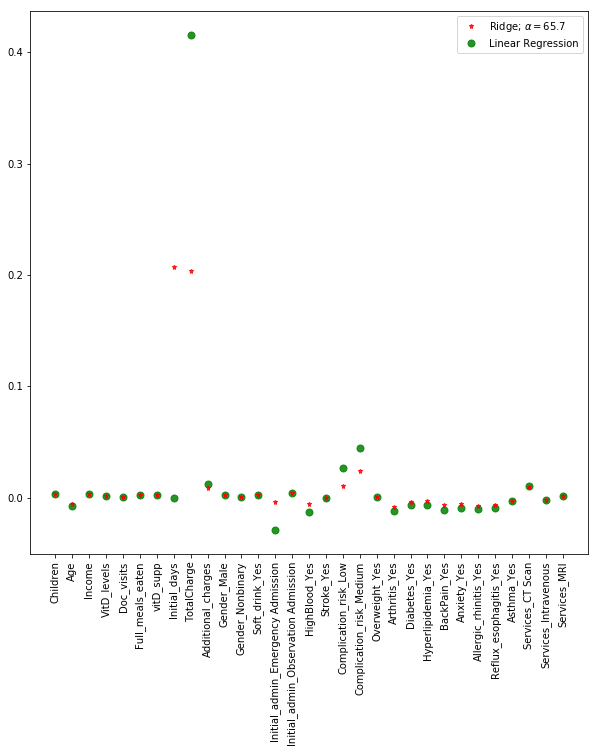

In [755]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridge_opt.coef_,alpha=ridge_optimal_alpha,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 65.7$',zorder=7)
plt.plot(features,lr.coef_,alpha=ridge_optimal_alpha,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()